# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
 !pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [3]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


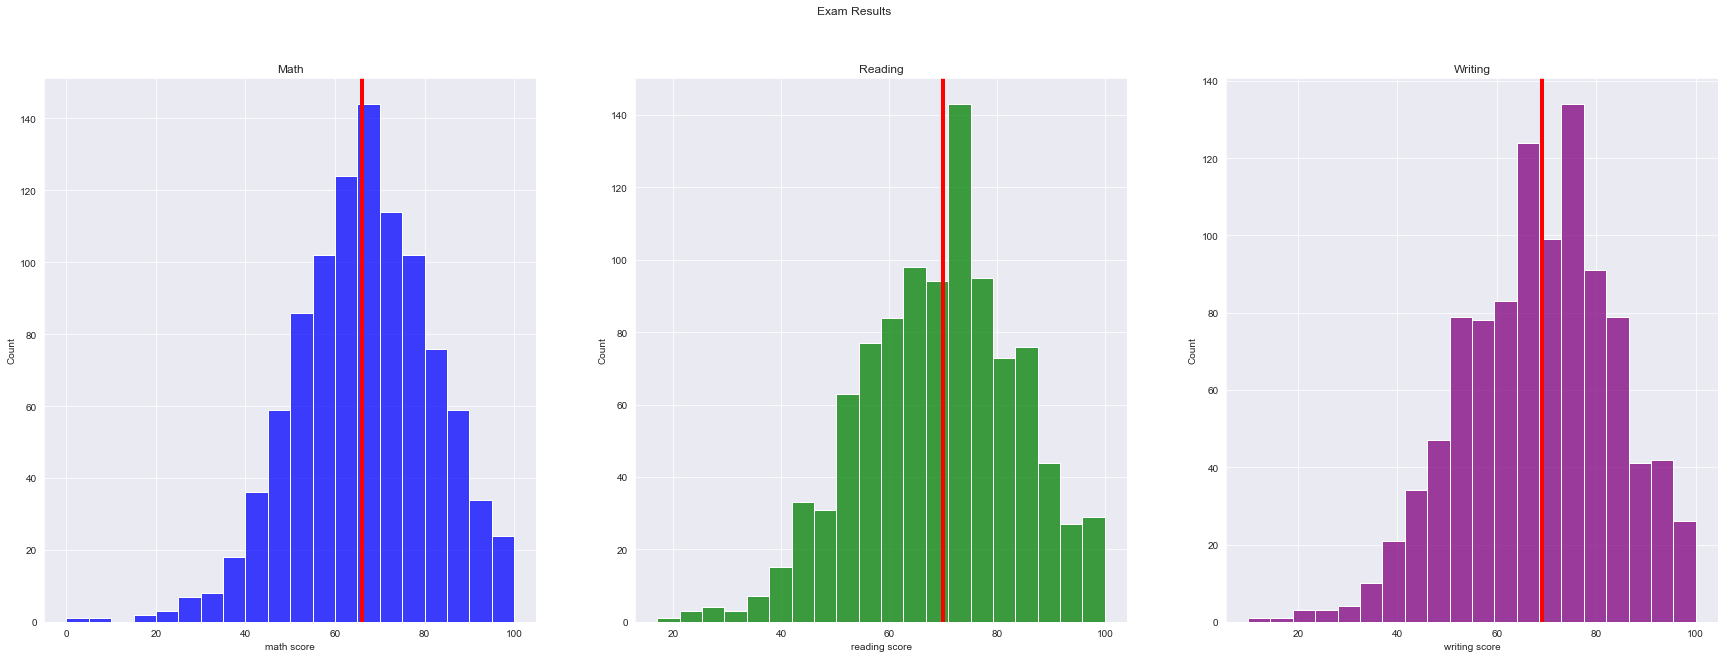

Median math: 66.0
Median reading: 70.0
Median writing: 69.0


In [4]:
math_median = df['math score'].median()
reading_median = df['reading score'].median()
writing_median = df['writing score'].median()

fig, axs = plt.subplots(1, 3, figsize=(30, 10))

fig.suptitle('Exam Results')

sns.histplot(df['math score'], bins=20, color='blue', ax=axs[0])
axs[0].axvline(math_median, color='red', linewidth=4)
axs[0].set_title('Math')

sns.histplot(df['reading score'], bins=20, color='green', ax=axs[1])
axs[1].axvline(reading_median, color='red', linewidth=4)
axs[1].set_title('Reading')

sns.histplot(df['writing score'], bins=20, color='purple', ax=axs[2])
axs[2].axvline(writing_median, color='red', linewidth=4)
axs[2].set_title('Writing')

plt.show()
print(f"Median math: {math_median}")
print(f"Median reading: {reading_median}")
print(f"Median writing: {writing_median}")

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


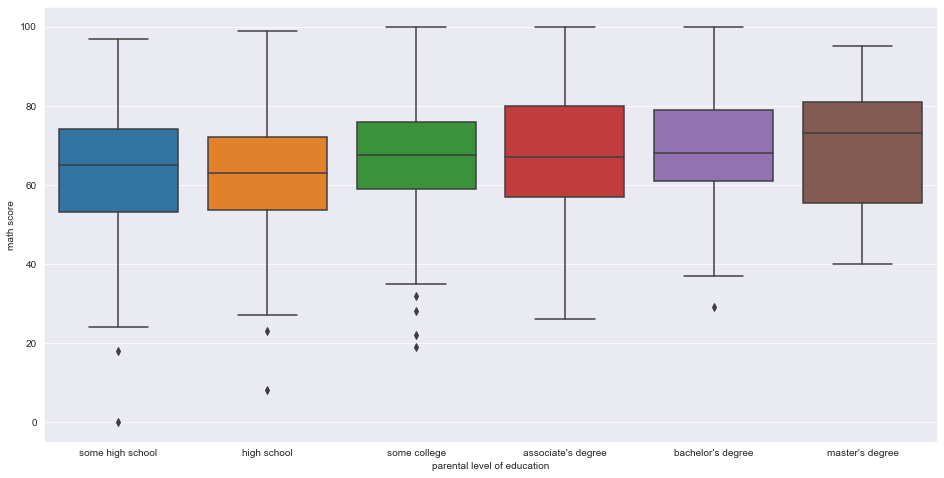

In [5]:
education_levels = df['parental level of education'].value_counts()
print(education_levels)

df["parental_lvl_code"] = df["parental level of education"].map(
    {
        "some high school": 0,
        "high school": 1,
        "some college": 2,
        "associate's degree": 3,
        "bachelor's degree": 4,
        "master's degree": 5,
    }
)
plt.figure(figsize=(16, 8))

df_sort_by_parents_education = df.sort_values(by="parental_lvl_code")
sns.boxplot(data=df_sort_by_parents_education, x="parental level of education", y="math score")
plt.show()
# Ответ: Да отличаются

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [6]:
high_score_female_students = df[(df['gender'] == 'female') &
                             (df['math score'] > 90) &
                             (df['reading score'] > 90) &
                             (df['writing score'] > 90)]

count = high_score_female_students.shape[0]
count

17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [7]:
df_1 = df.drop(['parental level of education', 'lunch', 'race/ethnicity', 'parental_lvl_code', 'test preparation course'], axis=1)
gender_score = df_1.groupby('gender').agg(['min', 'max', 'median'])
gender_score

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [8]:

df_2 = df_1.copy()
print(df['lunch'].value_counts())
print(df['test preparation course'].value_counts())
df_2['lunch'] = df['lunch']
df_2['preparation_course'] = df['test preparation course']
df_2['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df_2_gr = df_2.groupby(['gender', 'lunch', 'preparation_course'])['average_score'].agg(['mean'])
df_2_gr.sort_values(by="mean", ascending=False)
# Ответ: Да, влияют

standard        645
free/reduced    355
Name: lunch, dtype: int64
none         642
completed    358
Name: test preparation course, dtype: int64


mean
gender lunch        preparation_course           
female standard     completed           77.479532
male   standard     completed           73.513274
female standard     none                70.961240
       free/reduced completed           69.528571
male   free/reduced completed           65.721311
       standard     none                65.486043
female free/reduced none                59.501401
male   free/reduced none                58.323810

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

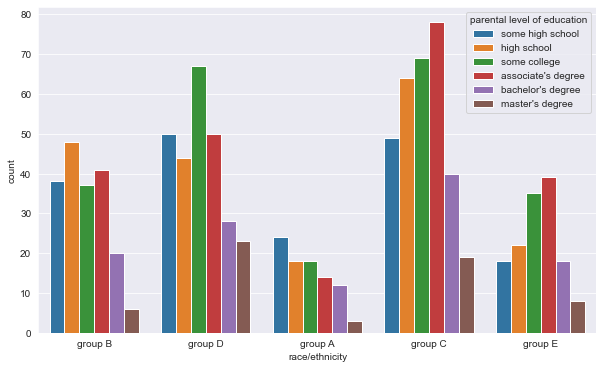

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_sort_by_parents_education, x='race/ethnicity', hue='parental level of education')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

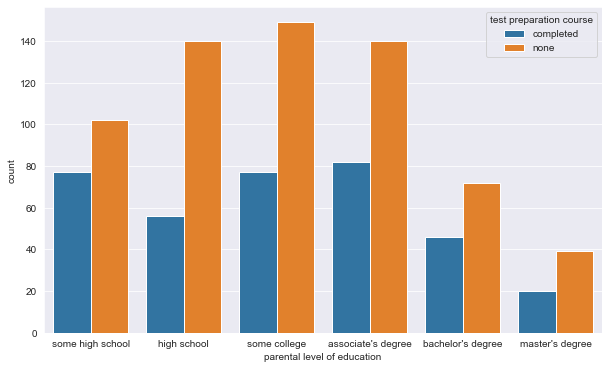

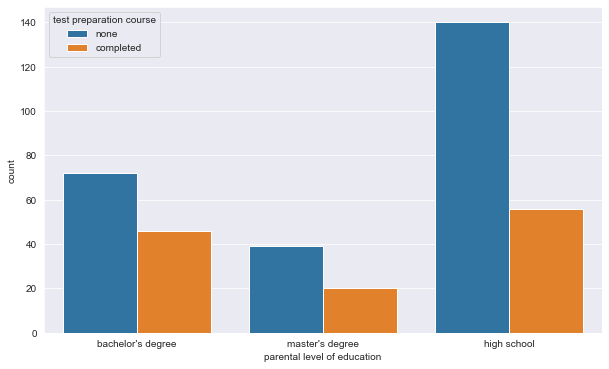

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_sort_by_parents_education, x='parental level of education', hue='test preparation course')
plt.show()

plt.figure(figsize=(10,6))
filtered_df = df[df['parental level of education'].isin(["high school", "bachelor's degree", "master's degree"])]
sns.countplot(data=filtered_df, x='parental level of education', hue='test preparation course')
plt.show()
# Дети, родители которых закончили только старшую школу, чаще ходят на курсы по подготовке к тестам

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

True     960
False     40
Name: math_pass, dtype: int64


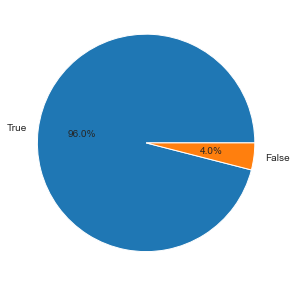

In [11]:
df['math_pass'] = df['math score'] >= 40

students_results = df['math_pass'].value_counts()
print(students_results)

plt.figure(figsize=(10,5))
plt.pie(students_results, labels = students_results.index, autopct='%1.1f%%')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

D    260
C    258
B    255
A    133
E     48
O     46
Name: grade, dtype: int64


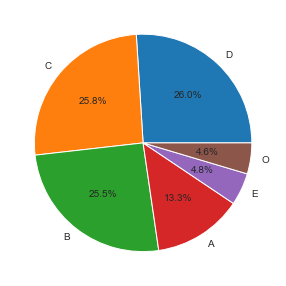

In [12]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
def get_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average_score'] < 41:
        return 'E'
    elif row['average_score'] < 61:
        return 'D'
    elif row['average_score'] < 71:
        return 'C'
    elif row['average_score'] < 81:
        return 'B'
    elif row['average_score'] < 91:
        return 'A'
    else:
        return 'O'

df['grade'] = df.apply(get_grade, axis=1)

grades = df['grade'].value_counts()
print(grades)

plt.figure(figsize=(10,5))
plt.pie(grades, labels = grades.index, autopct='%1.1f%%')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

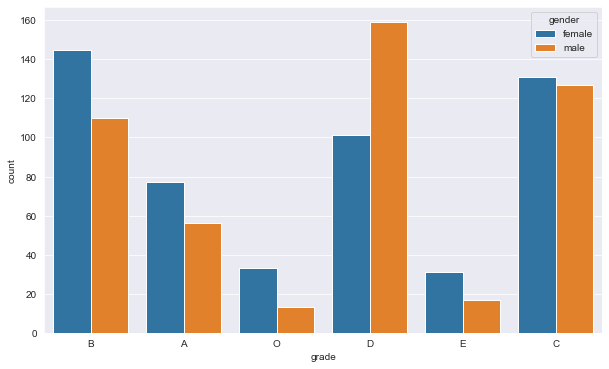

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='grade', hue='gender')
plt.show()
# Ответ: Студенты женского пола